In [3]:
import hyperopt
import numpy as np
from hyperopt import fmin, tpe, hp
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [2]:
# Загрузка и предобработка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, [60000,784])
x_test = x_test.astype(np.float32)
x_test = np.reshape(x_test, [10000,784])
y_train = y_train.astype(np.int64)
y_train = y_train.astype(np.int64)

In [15]:
def objective(params):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(params['units'], activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    
    return -val_accuracy  # Минимизация, так как Hyperopt ищет минимум функции

In [16]:
space = {
    'units': hp.choice('units', [32, 64, 128]),  # Количество нейронов в слое
    'learning_rate': hp.loguniform('learning_rate', -5, -1)  # Логарифмический выбор скорости обучения
}

In [17]:
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)  # Количество экспериментов
# на 7 эпохе достигла минимума и не менялась

100%|██████████| 10/10 [08:00<00:00, 48.04s/trial, best loss: -0.9587000012397766]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

x_train = x_train.astype(np.float32).reshape([60000, 784])
x_test = x_test.astype(np.float32).reshape([10000, 784])
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

def get_model(hidden_layer_dim, n_hidden_layers=1, meta=None):
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    n_classes_ = meta["n_classes_"]

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_features_in_, input_shape=X_shape_[1:]))
    model.add(keras.layers.Activation("relu"))

    # Create hidden layers in a loop
    for _ in range(n_hidden_layers):
        model.add(keras.layers.Dense(hidden_layer_dim))
        model.add(keras.layers.Activation("relu"))

    model.add(keras.layers.Dense(n_classes_))
    model.add(keras.layers.Activation("softmax"))
    return model

clf = KerasClassifier(
    get_model,
    loss="sparse_categorical_crossentropy",
    hidden_layer_dim=100,
    n_hidden_layers=1,
)

clf.fit(x_train, y_train)
y_proba = clf.predict_proba(x_train)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', clf),
])

pipe.fit(x_train, y_train)
y_proba = pipe.predict_proba(x_test)

params = {
    "hidden_layer_dim": [50, 100, 200],
    "loss": ["sparse_categorical_crossentropy"],
    "optimizer": ["adam", "sgd"],
    "optimizer__learning_rate": [0.0001, 0.001, 0.1],
    "n_hidden_layers": [1, 2, 3]  # <--- Add this line to test different numbers of hidden layers
}

gs = GridSearchCV(clf, params, refit=False, cv=3, scoring='accuracy')
gs.fit(x_train, y_train)
print(gs.best_score_, gs.best_params_)


1177/1250 [===========================>..] - ETA: 0s - loss: 0.5251

In [20]:
from tensorflow.keras import layers, models, optimizers, losses
model_optimum = keras.models.Sequential()
model_optimum.add(keras.layers.Dense(50, input_shape=x_train.shape[1:]))
model_optimum.add(keras.layers.Activation("relu"))
model_optimum.add(keras.layers.Dense(50))
model_optimum.add(keras.layers.Activation("relu"))
model_optimum.add(keras.layers.Dense(10))
model_optimum.add(keras.layers.Activation("softmax"))

model_optimum.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_optimum.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1364 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0788 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9861
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0382 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

In [36]:
test_loss, test_acc = model_optimum.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9733
Accuracy on the test set: 97.33%


In [37]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "hidden_layer_dim": [50, 100, 200],
    "loss": ["sparse_categorical_crossentropy"],
    "optimizer": ["adam", "sgd"],
    "optimizer__learning_rate": [0.0001, 0.001, 0.1],
}
gs = RandomizedSearchCV(clf, params, refit=False, cv=3, scoring='accuracy')

gs.fit(x_test, y_test)
print(gs.best_score_, gs.best_params_)

105/105 [==============================] - 0s 3ms/step
0.9094014080472235 {'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'hidden_layer_dim': 100}


In [54]:
from tensorflow.keras import layers, models, optimizers, losses
model_optimum = keras.models.Sequential()
model_optimum.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
model_optimum.add(keras.layers.Activation("relu"))
model_optimum.add(keras.layers.Dense(100))
model_optimum.add(keras.layers.Activation("relu"))
model_optimum.add(keras.layers.Dense(100))
model_optimum.add(keras.layers.Activation("softmax"))

model_optimum.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_optimum.fit(x_train, y_train, epochs=10, batch_size=32)
test_loss, test_acc = model_optimum.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2556 - accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0700 - accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1836 

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from bayes_opt import BayesianOptimization

# Определение функции для оптимизации
def keras_cnn(learning_rate, conv_1_filter, conv_1_kernel,
              num_conv_layers, dense_units):
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=int(conv_1_filter), kernel_size=int(conv_1_kernel),
                     activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    for i in range(int(num_conv_layers)):
        model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=int(dense_units), activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Определение диапазонов гиперпараметров для оптимизации
pbounds = {'learning_rate': (1e-4, 1e-2),
           'conv_1_filter': (32, 128),
           'conv_1_kernel': (3, 5),
           'num_conv_layers': (1, 3),
           'dense_units': (32, 512)}

# Создание объекта BayesianOptimization
optimizer = BayesianOptimization(f=keras_cnn, pbounds=pbounds, verbose=2, random_state=1)

# Запуск оптимизации
optimizer.maximize(init_points=5, n_iter=10)

# Вывод результатов оптимизации
print("Best parameters:", optimizer.max['params'])
print("Best validation accuracy:", optimizer.max['target'])

|   iter    |  target   | conv_1... | conv_1... | dense_... | learni... | num_co... |
-------------------------------------------------------------------------------------
| 1         | 0.987     | 72.03     | 4.441     | 32.05     | 0.003093  | 1.294     |
| 2         | 0.9835    | 40.86     | 3.373     | 197.9     | 0.004028  | 2.078     |
| 3         | 0.982     | 72.24     | 4.37      | 130.1     | 0.008793  | 1.055     |
| 4         | 0.9887    | 96.36     | 3.835     | 300.2     | 0.00149   | 1.396     |
| 5         | 0.9767    | 108.9     | 4.937     | 182.4     | 0.006954  | 2.753     |
| 6         | 0.9863    | 96.22     | 4.464     | 300.5     | 0.0027    | 2.041     |
| 7         | 0.9843    | 97.73     | 3.296     | 298.7     | 0.007028  | 1.133     |
| 8         | 0.9783    | 94.69     | 3.613     | 299.9     | 0.009769  | 1.268     |
| 9         | 0.988     | 96.58     | 4.594     | 299.3     | 0.004438  | 1.269     |
| 10        | 0.9785    | 97.8      | 3.511     | 299.

In [37]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

313/313 [==============================] - 1s 2ms/step - loss: 2.4473 - accuracy: 0.9763
Accuracy on the test set: 97.63%
313/313 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.9699
Accuracy on the test set: 96.99%


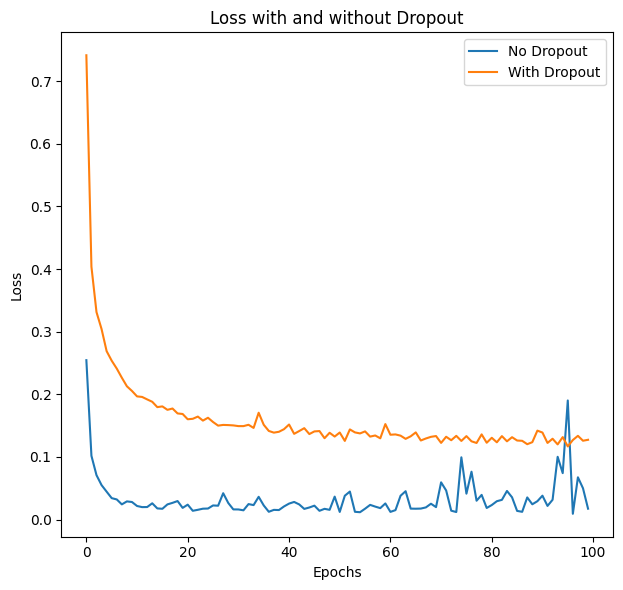

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# # Стандартизация данных
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Создание нейронной сети без Dropout
model_no_dropout = keras.models.Sequential()
model_no_dropout.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
model_no_dropout.add(keras.layers.Activation("relu"))
model_no_dropout.add(keras.layers.Dense(100))
model_no_dropout.add(keras.layers.Activation("relu"))
model_no_dropout.add(keras.layers.Dense(100))
model_no_dropout.add(keras.layers.Activation("softmax"))

model_no_dropout.compile(
    optimizer="adam", loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"]
)

# Создание нейронной сети с Dropout
model_with_dropout = keras.models.Sequential()
model_with_dropout.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
model_with_dropout.add(keras.layers.Activation("relu"))
#model_with_dropout.add(keras.layers.Dropout(0.8))
model_with_dropout.add(keras.layers.Dense(100))
model_with_dropout.add(keras.layers.Activation("relu"))
model_with_dropout.add(keras.layers.Dropout(0.8))
model_with_dropout.add(keras.layers.Dense(100))
model_with_dropout.add(keras.layers.Activation("softmax"))

model_with_dropout.compile(
    optimizer="adam", loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"]
)

# Обучение нейронных сетей и запись истории лосса
history_no_dropout = model_no_dropout.fit(
    x_train, y_train, epochs=100, batch_size=32, verbose=0
)
history_with_dropout = model_with_dropout.fit(
    x_train, y_train, epochs=100, batch_size=32, verbose=0
)

test_loss, test_acc = model_no_dropout.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")
test_loss, test_acc = model_with_dropout.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")

# Визуализация графиков лосса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history["loss"], label="No Dropout")
plt.plot(history_with_dropout.history["loss"], label="With Dropout")
plt.title("Loss with and without Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 15.9735 - accuracy: 0.9749
Accuracy on the test set: 97.49%
313/313 [==============================] - 1s 2ms/step - loss: 1.1308 - accuracy: 0.9657
Accuracy on the test set: 96.57%


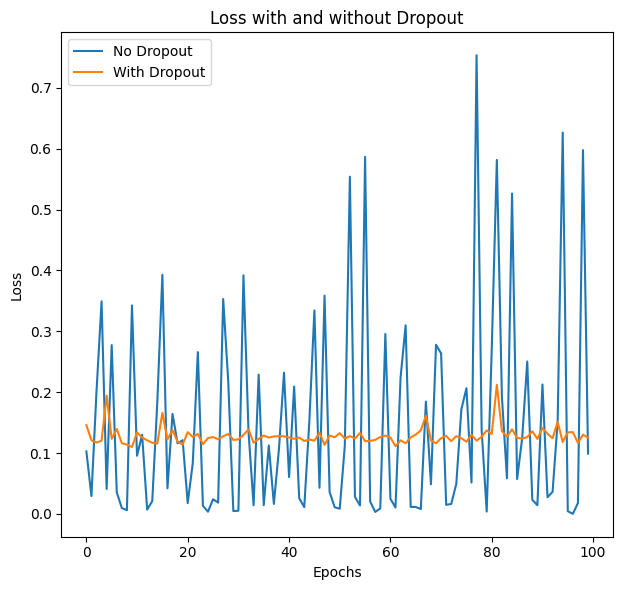

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# # Стандартизация данных
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Создание нейронной сети без Dropout
model_no_batch = keras.models.Sequential()
model_no_batch.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
model_no_batch.add(keras.layers.Activation("relu"))
model_no_batch.add(keras.layers.Dense(100))
model_no_batch.add(keras.layers.Activation("relu"))
model_no_batch.add(keras.layers.Dense(100))
model_no_batch.add(keras.layers.Activation("softmax"))

model_no_dropout.compile(
    optimizer="adam", loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"]
)

# Создание нейронной сети с Dropout
model_with_batch = keras.models.Sequential()
model_with_batch.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
model_with_batch.add(keras.layers.Activation("relu"))
model_with_batch.add(keras.layers.BatchNormalization())
model_with_batch.add(keras.layers.Dense(100))
model_with_batch.add(keras.layers.Activation("relu"))
model_with_batch.add(keras.layers.Dense(100))
model_with_batch.add(keras.layers.Activation("softmax"))

model_with_dropout.compile(
    optimizer="adam", loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"]
)

# Обучение нейронных сетей и запись истории лосса
history_no_batch = model_no_dropout.fit(
    x_train, y_train, epochs=100, batch_size=32, verbose=0
)
history_with_batch = model_with_dropout.fit(
    x_train, y_train, epochs=100, batch_size=32, verbose=0
)

test_loss, test_acc = model_no_dropout.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")
test_loss, test_acc = model_with_dropout.evaluate(x_test, y_test)
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")

# Визуализация графиков лосса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_batch.history["loss"], label="No Dropout")
plt.plot(history_with_batch.history["loss"], label="With Dropout")
plt.title("Loss with and without Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9708
Accuracy on the test set with stopping: 97.08%
313/313 [==============================] - 1s 3ms/step - loss: 2.9468 - accuracy: 0.9764
Accuracy on the test set without stopping: 97.64%


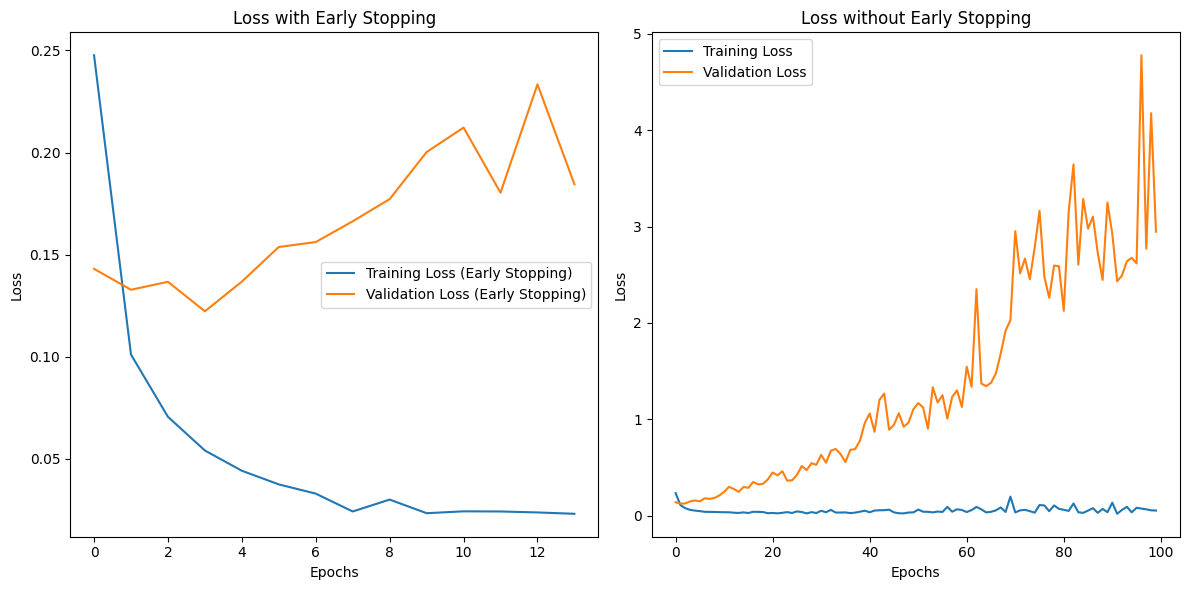

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# # Стандартизация данных
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# Создание нейронной сети
def create_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(100, input_shape=x_train.shape[1:]))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.Activation("softmax"))
    model.compile(optimizer="adam", loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    return model


# Создание callbacks для ранней остановки
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Создание двух одинаковых нейронных сетей с ранней остановкой
model1 = create_model()
history1 = model1.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping],
)

model2 = create_model()
history2 = model2.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=16,
    verbose=0,
)

test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f"Accuracy on the test set with stopping: {test_acc * 100:.2f}%")
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"Accuracy on the test set without stopping: {test_acc * 100:.2f}%")

# Визуализация графиков лосса с ранней остановкой и без
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history["loss"], label="Training Loss (Early Stopping)")
plt.plot(history1.history["val_loss"], label="Validation Loss (Early Stopping)")
plt.title("Loss with Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.title("Loss without Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step


<Axes: >

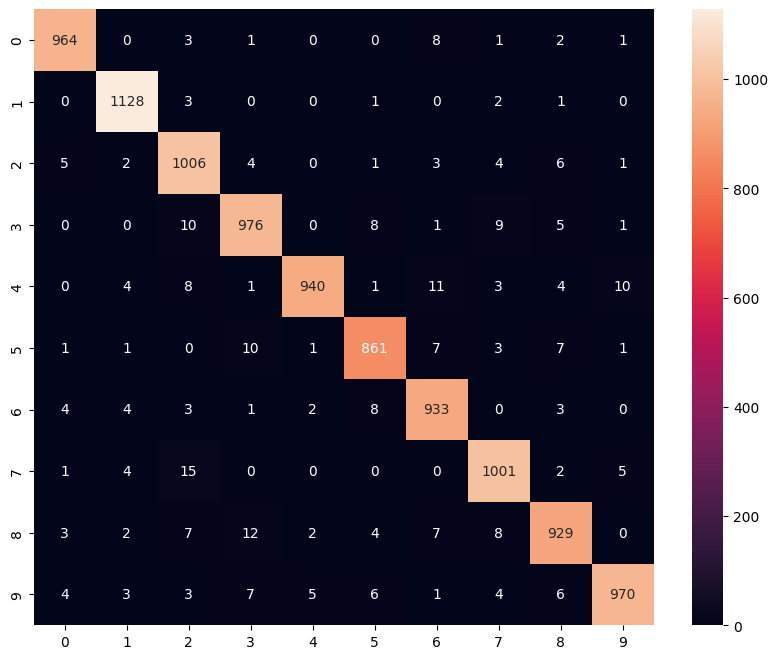

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_outputs = np.argmax(model1.predict(x_test), axis=1)

predicted_confusion_matrix = confusion_matrix(y_test, predicted_outputs)
predicted_confusion_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(predicted_confusion_matrix, annot=True, fmt='g')


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator



inputs = keras.Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]) 

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)



predicted_outputs = np.argmax(model.predict(x_test), axis=1)

predicted_confusion_matrix = confusion_matrix(y_test, predicted_outputs)
predicted_confusion_matrix

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3618 - accuracy: 0.8967 - val_loss: 0.1795 - val_accuracy: 0.9483
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1592 - accuracy: 0.9541 - val_loss: 0.1394 - val_accuracy: 0.9606
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9659 - val_loss: 0.1211 - val_accuracy: 0.9653
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.1147 - val_accuracy: 0.9669
313/313 - 0s - loss: 0.1102 - accuracy: 0.9669 - 376ms/epoch - 1ms/step
Test loss: 0.11024631559848785
Test accuracy: 0.9668999910354614
313/313 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9669
Test accuracy: 0.9668999910354614
313/313 [==========================

array([[ 967,    0,    0,    3,    0,    3,    1,    4,    2,    0],
       [   0, 1126,    2,    1,    0,    1,    2,    0,    3,    0],
       [   8,    1,  994,   12,    2,    0,    3,    7,    5,    0],
       [   0,    0,    0,  996,    0,    1,    0,    7,    4,    2],
       [   3,    0,    3,    1,  909,    1,   12,   14,    5,   34],
       [   3,    0,    0,   33,    0,  837,   12,    2,    5,    0],
       [   7,    2,    0,    1,    2,    3,  938,    1,    4,    0],
       [   1,    5,    8,    6,    0,    0,    0, 1004,    0,    4],
       [   3,    0,    5,   13,    1,    6,    3,    8,  933,    2],
       [   4,    5,    1,   11,    3,    3,    0,   15,    2,  965]],
      dtype=int64)

In [6]:
from tensorflow.keras.utils import plot_model

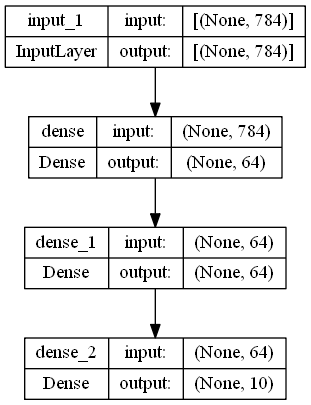

In [7]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [22]:
!pip install pydot

In [109]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
x_tr = x_train.reshape(60000,392,2)

In [16]:
x_t = x_test.reshape(10000,392,2)

In [15]:
x_test.shape

(10000, 784)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator



inputs1 = Input(shape=(28 * 28,))
inputs2 = Input(shape=(28 * 28,))
x = Dense(100, activation='relu')(inputs1)
x = Dense(100, activation='relu')(x)
x = Flatten()(x)


y = Dense(32, activation='relu')(inputs2)
y = Dense(64, activation='relu')(y)
y = Dense(128, activation='relu')(y)
y = Dense(64, activation='relu')(y)
y = Dense(32, activation='relu')(y)
y = Flatten()(y)

merged = Concatenate()([x, y])
x = Dense(128, activation='relu')(merged)
outputs = Dense(10, activation='softmax')(x)
#outputs = layers.Dense(10, activation='softmax')(x)
model = Model(inputs=[inputs1,inputs2], outputs=outputs)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
history = model.fit([x_train,x_train], y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)
test_scores = model.evaluate([x_test,x_test], y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]) 

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate([x_test,x_test], y_test)
print("Test accuracy:", test_accuracy)



predicted_outputs = np.argmax(model.predict([x_test,x_test]), axis=1)

predicted_confusion_matrix = confusion_matrix(y_test, predicted_outputs)
predicted_confusion_matrix

Epoch 1/5
750/750 [==============================] - 4s 3ms/step - loss: 0.2903 - accuracy: 0.9121 - val_loss: 0.1295 - val_accuracy: 0.9618
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.1061 - val_accuracy: 0.9681
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0786 - accuracy: 0.9753 - val_loss: 0.1022 - val_accuracy: 0.9697
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0932 - val_accuracy: 0.9737
313/313 - 1s - loss: 0.0812 - accuracy: 0.9756 - 500ms/epoch - 2ms/step
Test loss: 0.081232950091362
Test accuracy: 0.975600004196167
313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9756
Test accuracy: 0.975600004196167
313/313 [==============================

array([[ 967,    1,    2,    1,    0,    3,    2,    1,    2,    1],
       [   0, 1126,    4,    1,    0,    0,    2,    0,    2,    0],
       [   4,    2,  995,    0,    5,    0,    7,   10,    9,    0],
       [   0,    0,    0,  986,    0,   14,    0,    4,    3,    3],
       [   0,    0,    2,    0,  952,    0,    6,    3,    2,   17],
       [   2,    0,    0,    7,    1,  866,    5,    0,    8,    3],
       [   7,    3,    0,    1,    2,    2,  941,    1,    1,    0],
       [   1,    7,    4,    4,    0,    0,    0, 1005,    0,    7],
       [   3,    3,    2,    7,    2,    2,    3,    9,  942,    1],
       [   3,    8,    0,    7,    4,    4,    0,    4,    3,  976]],
      dtype=int64)

In [25]:
y_train.shape

(60000,)

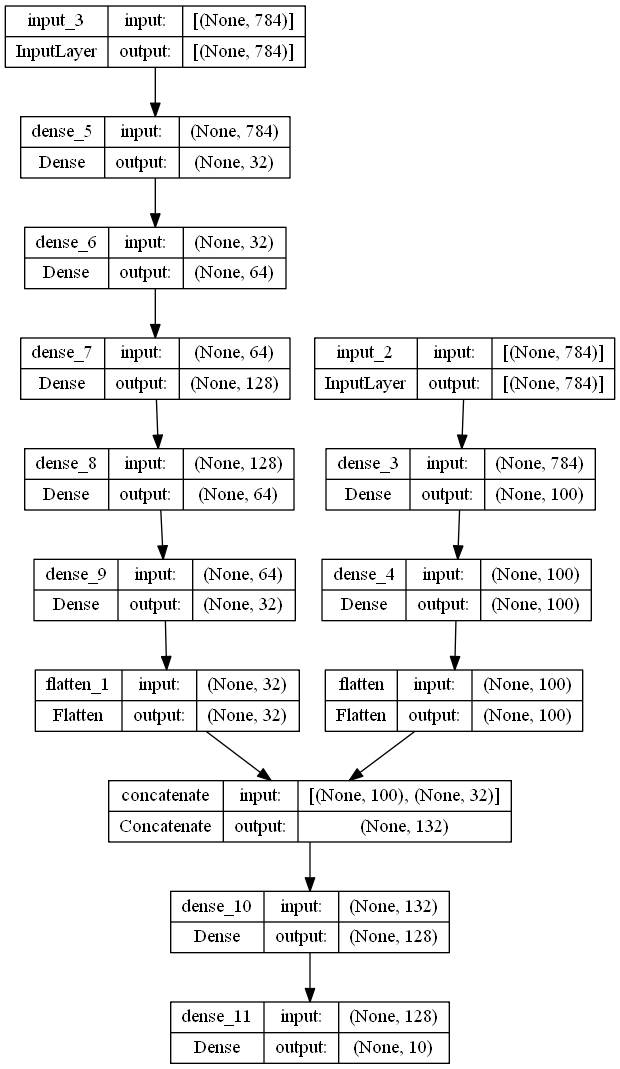

In [9]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 32)                   25120     ['input_3[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 64)                   2112      ['dense_5[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 784)]                0         []                            
                                                                                              